# BA 820 Homework 3 (100 Points)

Group Member Names: Chuheng(Kevin) Yu, Yuhan Wang, Linting(Linsey) Wang, Sixuan(Wilson) Wang, Tyler Christoforo

Reminder: you should not be sharing code across groups

Please submit 1) PDF answers and 2) python notebook. Grading will be based on the homework answer write up PDF. Python notebook is for reference and back up only. So please make sure that your all the outputs and answers are clearly visible in the pdf.

## 1 Latent Dirichlet Allocation [60pts]

In this problem, we will use Latent Dirichlet Allocation to perform topic modeling on Amazon Review datasets. In particular, we will take an in-depth look at different aspects of LDA model.

## 1.1 Installation

To perform LDA and visualize, please use Python 3.X. You will also need to install Numpy, Scipy, gensim, nltk, pyLDAvis library. Refer to requirements.txt for more details.
Use the following code to install the labraries.

The cell below tests if the packages we need have been installed correctly, and that we are in the correct environment.

In [ ]:
import gensim
import nltk
nltk.download("stopwords")
import pyLDAvis
import matplotlib
%matplotlib inline
import gzip # to unzip the data
import re # to replace punctuations
from nltk.corpus import stopwords # list of stopwords

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangsixuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.2 Datasets

You can download the Amazon reviews dataset of Cellphones & Accessory 5-Core Data [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz). Place the downloaded dataset in the same folder as this notebook. You can use the following code to read a datat from GZIp file

In [ ]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1.3 Data Cleaning

Now we will preprocess the data using the following steps:
   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

In [ ]:
# A function to clean a single line of text

def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = line.split(" ")
    filtered_content = []
    for word in line:
        if (word not in stopWords):  
            word = re.sub(punctuationRegex, '', word)
            if (len(word)>=2):
                filtered_content.append(word.lower())

    return filtered_content

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Finally, we put parse() and clean_line() function together and then extract the first 10,000 reviews into a new text file as your experiment dataset

In [ ]:
def read_dataset(fname):
    """ Read the 10000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 10000:
            break
    return exp_dataset

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
r = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 3.77 s, sys: 2.5 s, total: 6.26 s
Wall time: 9.12 s


## 1.4 Topic Analysis

**[5pts] Q1.4.1.1** Use topic numbers 3, 6, 9, 12, 15 respectively and print out all topics with 5 words.

For this We will use gensim to train an LDA model. gensim requires the following steps:

Construct a gensim.corpora.dictionary from the dataset
Construct a gensim "corpus" using this dictionary, by mapping each word to an index in the dictionary
Run LDA on this corpus

In [ ]:
import gensim
import gensim.corpora as corpora
dictionary = corpora.Dictionary(r) # create a gensim dictionary, store it in variable "dictionary"
corpus = [dictionary.doc2bow(i) for i in r] # create the gensim corpus, store it in variable "corpus"

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The function below prints the top num words in each topic for a given model.

In [ ]:

def print_topic_words(model,num):
    """ print top words in model topics.
    
    Args: 
        model: LDA model
        
    Returns:
        none
    """    
    print(model.print_topics(num_words=num))
    return 

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The following function builds multiple LDA models with number of topics specified in the list `num_topics`.

In [ ]:
def build_num_topic_model(dictionary, corpus, num_topics):
    """ Build lda model with given parameters, use print_topic_words to print words
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        num_topics: list of numbers
        
    Returns:
        none
    """    
    for num_topic in num_topics:
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topic, random_state=100,
                                                    update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)
        print_topic_words(lda_model,5)
        

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
build_num_topic_model(dictionary, corpus, [3, 6, 9, 12, 15])


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.028*"screen" + 0.020*"phone" + 0.010*"camera" + 0.009*"nokia" + 0.009*"data"'), (1, '0.018*"iphone" + 0.017*"battery" + 0.015*"it" + 0.015*"case" + 0.013*"use"'), (2, '0.029*"headset" + 0.024*"bluetooth" + 0.024*"ear" + 0.020*"sound" + 0.010*"quality"')]
[(0, '0.057*"doubles" + 0.054*"cable" + 0.033*"uses" + 0.031*"level" + 0.029*"alternative"'), (1, '0.094*"iphone" + 0.079*"case" + 0.042*"mophie" + 0.025*"pocket" + 0.022*"bottom"'), (2, '0.059*"headset" + 0.048*"ear" + 0.024*"convenient" + 0.016*"unit" + 0.016*"wearing"'), (3, '0.051*"screen" + 0.037*"however" + 0.023*"addon" + 0.020*"phone" + 0.017*"nokia"'), (4, '0.027*"battery" + 0.024*"it" + 0.022*"the" + 0.021*"phone" + 0.015*"use"'), (5, '0.037*"juice" + 0.020*"bluetooth" + 0.017*"use" + 0.017*"extra" + 0.016*"charge"')]
[(0, '0.217*"battery" + 0.066*"life" + 0.048*"doubles" + 0.028*"uses" + 0.027*"available"'), (1, '0.065*"iphone" + 0.054*"case" + 0.044*"it" + 0.029*"juice" + 0.029*"great"'), (2, '0.131*"however" + 0.07

**[3pts] Q1.4.1.2**  Explain what could be interpreted for each topics, and describe the similarity and difference between different topic numbers.

-Each topic and their top 5 estimated relevency/weighted words within is displayed. We can observe a focus/theme from these 5 words. For example, the first topic in the first three topics is about a nokia phone, the second is relevent to iphone case/battery, and the third one is about a wireless headphone.

**Similarity**: The same word appears across different parameteres. For example, the word "doubles" appears in 6,9 and 12 for the first topic. Furthermore, some topics have similar focuses across parameters. Topic one seems to focus in phone screens for 3, 12 and 15. 

**Difference**: First difference is the topics outputed, this is due to the parameters we set. Moreover, some topics are only present for certain parameters. For example, the output from 9 seems to cover "battery" while others don't. One more difference is the weight each words has for each topic.

**[2pts] Q1.4.1.3**  Which topic number would you choose? Explain.

-From observation, it seems that the larger the topic number, the more subjective or descriptive words start to appear. Take parameter 15 as an example, topic 5 shows words like "annoying" and "handy". These words are much more useful in helping with language analysis. Therefore, choosing the larger parameter, 15, would be an optimal choice.

## 1.5 Model Evaluation

**[12 pts] Q1.5.1** Now we investigate two methods to evaluate our model and choose the topic number

1.Perplexity is a measurement of how well a probability distribution or probability model predicts a sample. A low perplexity indicates the probability distribution is good at predicting the sample. We can use model.log_perplexity(document) to evaluate the perplexity of our LDA model.

2.Topic coherence is a one type of interpretability measurement for a topic. It measures if a set of top keywords describe a coherent and singular concept. A good topic will have high topic coherence score. We can use CoherenceModel(model=ldamodel).get_coherence() to calculate it.

Plot Perplexity and topic coherence scores of our LDA model for topic number 3,6,9,12,15,20,50.

The code below trains topic models with different numbers of topics and measures their coherence and perplexity.

In [ ]:
# perplexity 
# run different number of topics to get perplexity and coherence value for this model
from gensim.models.coherencemodel import CoherenceModel
def get_measurement_for_model(dictionary, corpus, topic_nums):
    """ Build lda model with given parameters 
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        topic_nums: a list contains all possible topic number
        
    Returns:
        2 lists: one of perplexities, and one of coherence value
    """  
    perplexity = []
    coherence_value=[]
    for num_topic in topic_nums:
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topic, random_state=100,
                                                    alpha='auto',per_word_topics=True)
        perplexity.append(lda_model.log_perplexity(corpus))
        coherence_model_lda = CoherenceModel(model=lda_model, texts=r, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_value.append(coherence_lda)
    return perplexity,coherence_value

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
perplexity, coherence = get_measurement_for_model(dictionary, corpus, [3, 6, 9, 12, 15, 20, 50])

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(perplexity)
print(coherence)

[-8.006962250029888, -8.172577509700758, -8.48297107592128, -9.548681816044231, -13.231171163236567, -16.974818524403197, -29.702365738746032]
[0.47822958237811064, 0.380644419686559, 0.2888710315572619, 0.3000841502626102, 0.3379206754086787, 0.29336232040957777, 0.43960032246440484]


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can now plot the coherence and perplexity of each model.

In [ ]:
import matplotlib.pyplot as plt

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


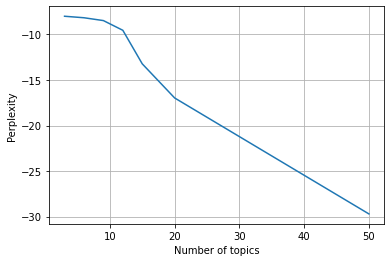

In [ ]:
plt.plot([3, 6, 9, 12, 15, 20, 50], perplexity)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.show()

**[2pts] Q1.5.2**  From the above graph what topic number would you choose and why? Is it a good idea to choose the topic number based on perplexity? why or why not?

-From the graph above, 50 topic numbers has the lowest perplexity. As mentioned, a lower perplexity is associated with a good indication on the probability distribution predicting the sample. Hence, we would choose 50 number of topics. 

However, it is not a good idea to base topic numbers on just perplexity, because it might not indicate a high coherence.

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


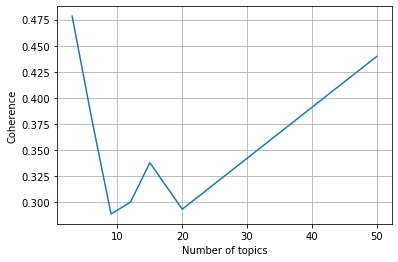

In [ ]:
plt.plot([3, 6, 9, 12, 15, 20, 50], coherence)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()

**[2pts] Q1.5.3**  From the above graph what topic number would you choose and why?

-Given the fact that a higher coherence means a good topic, it would make sense to choose 50 topics or 5 topics. We can eliminate 5 topic as a parameter as it will most likely not capture the complexity and diversity.

**[4pts]Q1.5.4** Compare two methods you implemented in the previous quesions, which one do you think is better and why? In answering, please discuss the actual topics generated.

-Since both measures led to an answer of 50 topics, that means coherence and complexity has met an agreement. This might not be the case in all, therefore it is important to find a balance of the two. A good coherence is demonstrated by the 15 topics we have generated from **1.4**. It gave decent evidence to evalute human judgement of the  quality review, with more descriptive words like "great" in topic 9.

## 1.6 Alpha and Beta in LDA

**[7pts]Q1.6.1** In this problem, we will check the two most important parameters in LDA model: alpha and beta. Alpha represents document-topic density - with a higher alpha, documents are made up of more topics, and with lower alpha, documents contain fewer topics. Beta represents topic-word density - with a high beta, topics are made up of most of the words in the corpus, and with a low beta they consist of few words.

In [ ]:
best_topic_num = 50 # CHANGE THIS

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#model 1
model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=best_topic_num, random_state=100,
                                            update_every=1,alpha=1/best_topic_num,eta=1/best_topic_num,per_word_topics=True)
print_topic_words(model1,5)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, '0.120*"doubles" + 0.074*"afford" + 0.050*"normally" + 0.038*"port" + 0.038*"uses"'), (32, '0.019*"battery" + 0.015*"phone" + 0.012*"mah" + 0.010*"the" + 0.009*"backbeat"'), (47, '0.051*"stylus" + 0.037*"gs" + 0.027*"iphone" + 0.008*"cable" + 0.008*"keyboard"'), (25, '0.030*"daughter" + 0.010*"loves" + 0.008*"surprising" + 0.006*"chose" + 0.006*"speech"'), (36, '0.144*"travelling" + 0.115*"alternative" + 0.090*"rechargeable" + 0.049*"use" + 0.036*"iphone"'), (44, '0.023*"phone" + 0.020*"the" + 0.019*"it" + 0.016*"battery" + 0.012*"great"'), (30, '0.034*"phone" + 0.012*"it" + 0.009*"nokia" + 0.008*"one" + 0.007*"phones"'), (49, '0.439*"juice" + 0.038*"home" + 0.037*"battery" + 0.035*"iphones" + 0.030*"use"'), (26, '0.028*"it" + 0.026*"works" + 0.025*"cable" + 0.018*"apple" + 0.016*"great"'), (23, '0.379*"iphones" + 0.064*"extra" + 0.031*"battery" + 0.030*"glad" + 0.023*"charger"'), (24, '0.471*"packs" + 0.015*"rather" + 0.014*"seller" + 0.011*"item" + 0.010*"arrived"'), (35, '0.016

In [ ]:
#model 2
model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=best_topic_num, random_state=100,
                                            update_every=1,alpha=0.5,eta=0.2,per_word_topics=True)
print_topic_words(model2, 5)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, '0.009*"charge" + 0.008*"charger" + 0.005*"battery" + 0.005*"phone" + 0.004*"samsung"'), (32, '0.006*"battery" + 0.003*"phone" + 0.003*"great" + 0.002*"mah" + 0.002*"the"'), (47, '0.003*"great" + 0.002*"phone" + 0.002*"it" + 0.002*"effectly" + 0.002*"beefs"'), (25, '0.002*"effectly" + 0.002*"beefs" + 0.002*"encumbered" + 0.002*"attachedif" + 0.002*"unavoidably"'), (36, '0.004*"use" + 0.003*"it" + 0.003*"great" + 0.003*"the" + 0.002*"phone"'), (44, '0.007*"battery" + 0.004*"packs" + 0.004*"the" + 0.004*"great" + 0.004*"it"'), (30, '0.005*"phone" + 0.003*"charger" + 0.003*"it" + 0.002*"great" + 0.002*"use"'), (49, '0.003*"great" + 0.003*"phone" + 0.003*"charger" + 0.002*"it" + 0.002*"battery"'), (26, '0.002*"it" + 0.002*"great" + 0.002*"encumbered" + 0.002*"effectly" + 0.002*"attachedif"'), (23, '0.002*"effectly" + 0.002*"beefs" + 0.002*"attachedif" + 0.002*"encumbered" + 0.002*"unavoidably"'), (24, '0.002*"effectly" + 0.002*"encumbered" + 0.002*"attachedif" + 0.002*"beefs" + 0.002*

In [ ]:
#model 3
model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=best_topic_num, random_state=100,
                                            update_every=1,alpha='auto',eta='auto',per_word_topics=True)
print_topic_words(model3, 5)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(45, '0.030*"didnt" + 0.017*"post" + 0.014*"workouts" + 0.014*"workout" + 0.013*"youre"'), (25, '0.030*"daughter" + 0.010*"loves" + 0.007*"surprising" + 0.006*"chose" + 0.006*"speech"'), (22, '0.013*"tab" + 0.011*"sd" + 0.008*"reader" + 0.008*"card" + 0.007*"phone"'), (21, '0.025*"color" + 0.021*"condition" + 0.018*"phone" + 0.012*"good" + 0.012*"again"'), (47, '0.051*"stylus" + 0.036*"gs" + 0.026*"iphone" + 0.008*"junk" + 0.008*"cable"'), (41, '0.018*"applying" + 0.012*"incase" + 0.009*"behavior" + 0.008*"the" + 0.007*"guitar"'), (37, '0.013*"brand" + 0.008*"works" + 0.008*"ip" + 0.007*"droid" + 0.007*"zip"'), (42, '0.016*"really" + 0.014*"de" + 0.013*"mirror" + 0.013*"it" + 0.012*"writing"'), (15, '0.021*"ps" + 0.009*"useful" + 0.008*"good" + 0.008*"like" + 0.008*"tooth"'), (14, '0.015*"phone" + 0.014*"youtube" + 0.014*"case" + 0.013*"buy" + 0.013*"rim"'), (34, '0.246*"heft" + 0.134*"increase" + 0.036*"doubles" + 0.028*"regularly" + 0.020*"life"'), (46, '0.243*"depth" + 0.108*"incre

**[3pts]1.6.2**  Explain how the different alpha and beta values theoretically influence the LDA model. Then describe what you find in the empirical result (e.g difference in topic words and topics)

-The results from the 3 models cover different alphas and betas. Model 1 produced more diverse topics with informative weights. First, we compare a larger alpha beta versus a smaller alpha beta. Comparitively model 2 has more repeated topics of exact same words, these words all have a 0.000 weight. In a sense, a higher alpha beta means documents contain more similar content, and topics with more similar words. Looking at the alpha beta when using "auto", it seems to fall in between model 1 and model 2. Auto means it learns asymmetric prior from the corpus. The results have a better representation of topics. Although some still show little to no weight. 

## 1.7 LDA on a short text dataset

**[10pts]1.7.1** In this part, we will read a dataset from twitter and build a LDA model. On Windows, download and unzip the dataset from [this link](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). Place the downloaded dataset in the same folder as this notebook. Use the first 10,000 lines in the "training.1600000.processed.noemoticon.csv" file. 

In [ ]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip # Linux and OSX only
!unzip trainingandtestdata.zip # Linux and OSX only

/bin/bash: wget: command not found
unzip:  cannot find or open trainingandtestdata.zip, trainingandtestdata.zip.zip or trainingandtestdata.zip.ZIP.


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!head -n 10000 training.1600000.processed.noemoticon.csv > twitter.csv # Linux and OSX only

head: training.1600000.processed.noemoticon.csv: No such file or directory


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def read_twitter(fname):
    """ Read the given dataset into list and clean stop words. 
    
    Args: 
        fname (string): filename of Twitter Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    twitter = []
    
    with open(fname,encoding="utf-8") as f:
        sum=0
        for line in f:
            tweet = f.readline().split(",")[5]


            line=tweet.split()
            stopWords = set(stopwords.words('english'))
            filtered_content = []
            for word in line:
                if (word not in stopWords):  

                    filtered_content.append(word)
            twitter.append(filtered_content)
            sum+=1
            if sum ==10000:
                break
    return twitter

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
twitter = read_twitter('./trainingandtestdata/training.1600000.processed.noemoticon.csv')

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1.19 s, sys: 364 ms, total: 1.56 s
Wall time: 1.63 s


In [ ]:
twitter_dictionary = corpora.Dictionary(twitter) # TODO: build dictionary
twitter_corpus = [twitter_dictionary.doc2bow(i) for i in twitter] # TODO: build corpus for model

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
lda_model_twitter = gensim.models.ldamodel.LdaModel(corpus=twitter_corpus,id2word=twitter_dictionary,num_topics=5, 
                                                    random_state=100,alpha='auto',per_word_topics=True)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.017*"think" + 0.016*"work" + 0.014*"sorry" + 0.012*"right" + 0.011*"&amp;"'), (1, '0.029*"get" + 0.029*"go" + 0.021*"want" + 0.014*"one" + 0.013*"need"'), (2, '0.018*"-" + 0.011*"new" + 0.010*"love" + 0.009*"getting" + 0.009*"come"'), (3, '0.019*"home" + 0.017*"can\'t" + 0.013*"today" + 0.010*"would" + 0.009*"twitter"'), (4, '0.151*""" + 0.067*"I" + 0.014*""I" + 0.011*"like" + 0.010*"I\'m"')]
CPU times: user 21.5 s, sys: 79 ms, total: 21.6 s
Wall time: 21.7 s


In [ ]:
print_topic_words(lda_model_twitter,5)

[(0, '0.017*"think" + 0.016*"work" + 0.014*"sorry" + 0.012*"right" + 0.011*"&amp;"'), (1, '0.029*"get" + 0.029*"go" + 0.021*"want" + 0.014*"one" + 0.013*"need"'), (2, '0.018*"-" + 0.011*"new" + 0.010*"love" + 0.009*"getting" + 0.009*"come"'), (3, '0.019*"home" + 0.017*"can\'t" + 0.013*"today" + 0.010*"would" + 0.009*"twitter"'), (4, '0.151*""" + 0.067*"I" + 0.014*""I" + 0.011*"like" + 0.010*"I\'m"')]


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1.8 LDA visualization

**[10pts]1.8.1** We will now visualize the LDA output using pyLDAvis. PyLDAVis shows the following:

   1. The distances between topics, as a map in 2-D space.
   2. The variance in the topic-word distribution, as the size of a circle in this map.
   3. The most "salient" terms in each topic.

In [ ]:
sentences = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")[:1000] # CHANGE TO YOUR DATASET

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
import pyLDAvis.gensim

CPU times: user 1.39 s, sys: 544 ms, total: 1.94 s
Wall time: 1.63 s


In [ ]:
sentences_dictionary = corpora.Dictionary(sentences) # create a gensim dictionary, store it in variable "dictionary"
sentences_corpus = [sentences_dictionary.doc2bow(i) for i in sentences]
lda_model = gensim.models.ldamodel.LdaModel(corpus=sentences_corpus,
                                           id2word=sentences_dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(lda_model, sentences_corpus, sentences_dictionary)


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


CPU times: user 332 ms, sys: 265 ms, total: 597 ms
Wall time: 4.27 s


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(data)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2.word2Vec [40pts]


In this problem, we use Amazon Review Dataset to perform Word2Vec and Doc2Vec to extract insights relevant for e-commerce business. For this question, download and use the dataset [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz||reviews_Electronics_5.json.gz).

## 2.1 Data Cleaning



The following code reads the data from a GZIP file.

In [ ]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We will now read the data and preprocess it using the following steps:

   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

   And finally extract 10000 reviews.

In [ ]:
# A function to clean a single line of text
def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = line.split(" ")
    filtered_content = []
    for word in line:
        if (word not in stopWords):  
            word = re.sub(punctuationRegex, '', word)
            if (len(word)>=2):
                filtered_content.append(word.lower())

    return filtered_content

def read_dataset(fname):
    """ Read the 100000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 100000:
            break
    return exp_dataset    

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
r = read_dataset("reviews_Electronics_5.json.gz")

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 29.7 s, sys: 6.25 s, total: 36 s
Wall time: 38.5 s


## 2.2 Build a doc2vec model

**[3pts]2.2.1** In this question, first we will build a Word2Vec model using ginsim using size=300, min_count=40, win- dow=10, negative=10, max_vocab_size=10000. Train the model for 30 epochs.

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=r, vector_size=300, window=10, min_count=40, negative=10, max_vocab_size=10000,epochs=30)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**[2pts]2.2.2** Use model.wv.doesnt_match to find a word in ["Canon","Nikon","junk"] that does not

belong.

In [ ]:
# YOUR CODE HERE ["Canon", "Nikon", "junk"]
import gensim
model.wv.doesnt_match(["Canon", "Nikon", "junk"])

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'junk'

**[3pts]2.2.3** Come up with 3 other word lists and apply the above function. Explain your observation.

In [ ]:
model.wv.doesnt_match(["japan", "china", "one"])

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'one'

-We chose "japan", "china" and "one". As the first two are countries, it is expected that "one" would be the one that doesn't match. The relevency between "one" and countries are not that close.

**[2pts]2.2.4** What are some tasks in e-commerce that can be solved with this simple function?

-New product labels and tags; This function can use the product description as a frame of reference, and label a newly listed product with the most relevant tags and labels. This way it can advertise the product in a more accurate and automated way.

## 2.3 Build a doc2vec model

**[15 pts] 2.3.1**  Each review is marked by other customers as “helpful” or not. The "helpful: [a, b]" item in each review is (a) the number of people who marked the review as helpful, and (b) the total number of people who have marked the review as helpful or unhelpful. The "helpfulness" score of a review can be calculated as a/b. Define a "helpful" review as one with helpfulness score >= 0.8. Given a review that is only slightly helpful, could we find textually similar reviews but have higher helpfulness? Build Doc2Vec model with gensim on review data. Use product ID “B00006I5WJ” and ReviewerID with “A14453U0KFWF31” as an example, find top 5 helpful reviews of the same product with similarity score above 0.8. 

In [ ]:
import os
def read_reviewers_data(fname, min_count=0):
    '''
    Save all reviews into their own product asin files.
    Make sure you have 'product' folder when you run this answer.
    In each file, you can choose your own log structure. In this answer, log strucutre is like 
        "reviewText"\t"reviewerID"\t"helpful"
    Args: 
        fname: dataset file path
        min_count: minimum number of reviews of a product
    Returns:
        none
    '''
    if not os.path.isdir('product'):
        os.makedirs('product')
    asin_list = []
    tmp_list = []
    last_asin = ""
    j = 0
    for i in parse(fname):
        if last_asin != i['asin']:
            if len(tmp_list) > min_count:
                f = open("product/" + last_asin+".txt", 'w')
                for one in tmp_list:
                    f.write(one)
                f.close()
            tmp_list = []
            last_asin = i['asin']
        tmp_list.append(i["reviewText"] + '\t' + i["reviewerID"] +
                    '\t' + handle_helpful(i["helpful"]) + "\n")
        j += 1
        if j > 100000:
            break
            
def handle_helpful(helpful):
    '''
    Helper function for helpful_score calculate
    Args: 
        helpful: list. The first element is the number of people think this is helpful. The second element
            is the total number of people evaluate this comment
    Returns:
        String: number represent helpfulness
    '''
    if helpful[1] != 0:
        helpfulness = 1.0 * helpful[0] / helpful[1]
        return str(helpfulness)
    else:
        return str(0)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data=read_reviewers_data("reviews_Electronics_5.json.gz")

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class TaggedReviewDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, dirname):
        self.dirname = dirname
        self.helpfulness = {}  # key:reviewerID value:helpfulness
        self.product = {}      # key:asin value:reviewerID
        self.asin = []

    def __iter__(self):
        for filename in os.listdir(self.dirname):
            asin_code = filename[:-4] #delete ".txt"
            self.product[asin_code] = []
            self.asin.append(asin_code)
            for line in enumerate(open(self.dirname + "/" + filename)):
                line_content = line[1].split("\t")
                self.product[asin_code].append(line_content[1])
                self.helpfulness[line_content[1]] = float(line_content[2])
                yield TaggedDocument(clean_line(line_content[0]), [line_content[1], line_content[2]])


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
documents = TaggedReviewDocument("product")

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
d2v_model = Doc2Vec(vector_size=4, min_count=40, epochs=10)
d2v_model.build_vocab(documents)
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=10)
#model=gensim.models.Doc2Vec(documents)
# YOUR CODE HERE

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 7min 5s, sys: 1min 12s, total: 8min 17s
Wall time: 7min 52s


In [ ]:
#d2v_model.save("d2v.model")

In [ ]:
#gensim.models.Doc2Vec.load("d2v.model")

### Find similar reviews

In [ ]:
def find_similar_reviews(asin,reviewer_id):
    '''
    If one review is similar to the specefic review and it is much helpful, save it to a list
    Args: 
        asin: product asin
        reviewer_id: the specific review
    Returns:
        list of reviewer id
    '''
    result = []
    sim_to_ref_set = {}
    id_list=documents.product[asin]
    for id in id_list:
        if (d2v_model.docvecs.similarity(reviewer_id,id)>0.8) and (documents.helpfulness[id]>0.8) and (id != reviewer_id):
            sim_to_ref_set[id]=documents.helpfulness[id]
    sims_ranked = sorted(sim_to_ref_set.items(), key=lambda it:it[1], reverse=True)
    for i in range(5):
        result.append(sims_ranked[i][0])
        
    return result

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(find_similar_reviews("B00006I5WJ", "A14453U0KFWF31")) 

['A1ZJSYEQQDIDAA', 'A5C7KD02LS69I', 'A1MSY5U64K1Y3D', 'A3GTQ229J3PFN8', 'A3I4TQNEO4G6LT']


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-272-696bd3585e88>:14: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  if (d2v_model.docvecs.similarity(reviewer_id,id)>0.8) and (documents.helpfulness[id]>0.8) and (id != reviewer_id):
<ipython-input-272-696bd3585e88>:14: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  if (d2v_model.docvecs.similarity(reviewer_id,id)>0.8) and (documents.helpfulness[id]>0.8) and (id != reviewer_id):
<ipython-input-272-696bd3585e88>:14: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been re

**So the top 5 helpful reviewers' id of the same product with similarity score above 0.8 are 'A1ZJSYEQQDIDAA', 'A5C7KD02LS69I', 'A1MSY5U64K1Y3D', 'A3GTQ229J3PFN8', 'A3I4TQNEO4G6LT' respectively.**

## 2.4 Build a doc2vec model using product descriptions


**[10pts]2.4.1** Use product descriptions (located in meta data  [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz)) to build a Doc2Vec model. When building the doc2vec model, use vector_size=100, window=15, min_count=5, max_vocab_size=1000, and train it for 1 epoch.

In [ ]:
def read_product_description(fname):
    '''
    Load all product descriptions
    Args: 
        fname: dataset file path
    Returns:
        dict: key is asin, value is description content
    '''
    result = {}
    for i in parse(fname):
        try:
            if "Camera & Photo" in i["categories"][0]:
                result[i["asin"]]=i["description"]
        except:
            continue
    return result

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class TaggedDescriptionDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, descriptondict):
        self.descriptondict = descriptondict
        

    def __iter__(self):
        for asin in self.descriptondict:
            for content in self.descriptondict[asin]:
                yield TaggedDocument(clean_line(content), [asin])


/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
description_dict = read_product_description("meta_Electronics.json.gz")
des_documents = TaggedDescriptionDocument(description_dict)

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Build a doc2vec model
d2v_model2 = Doc2Vec(vector_size=100, window=15, min_count=5, max_vocab_size=1000)
d2v_model2.build_vocab(des_documents)
d2v_model2.train(des_documents, total_examples=d2v_model2.corpus_count, epochs=1)

In [ ]:
d2v_model2.save("d2v_model2.model")

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
d2v_model2=gensim.models.Doc2Vec.load("d2v_model2.model")

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**[5pts]2.4.2** Find the most similar product for Canon EOS 5D (asin:B0007Y791C) not made by Canon.

In [ ]:
similar_doc = d2v_model2.docvecs.most_similar('B0007Y791C', topn = 30)
products=similar_doc[:3]
for product in products:
    print(product)
    print(des_documents.descriptondict[product[0]])

('B001BP1YEE', 0.4226471781730652)
Why Choose? Why Settle? Introducing the New Kata 3N1!Why choose between a backpack and a sling when you simply can pick up one of the new Kata 3N1 bags and get the best features of each type of bag? These unique bags provide ultimate freedom designed with three carrying options in one bag: right-handed sling, left-handed sling and backpack. Quick access to a camera has never been faster with a sling that offers a quick release and one-handed bag opening for camera access. Left-handed photographers can celebrate as they discover the first photo bag that can be configured as a left-handed sling. When not in a situation that requires quick camera access, convert the 3N1 into an ergonomic and comfortable backpack. All these product features come in a package that includes the unique combination of protection, light weight and style that has become Kata&#x92;s calling card.Kata 3NI HighlightsFlexible Configurations to Ensure Maximum UseUse both as a sling 

/Users/wangsixuan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-9ded70ea196e>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = d2v_model2.docvecs.most_similar('B0007Y791C', topn = 30)


From the most similar product descriptions, we can conclude that New Kata 3N1 is the most similar product for Canon EOS 5D.